<a href="https://colab.research.google.com/github/arshiyasaiyad/Calculator/blob/main/animal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

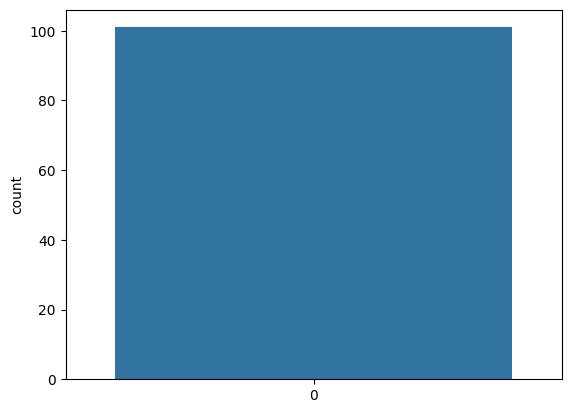

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
data = pd.read_csv("/content/zoo.csv")
data.head()
sns.countplot(data.iloc[:, -1:].values.flatten())
data.isna().sum()
X = data.iloc[:, 1:-1].values # iloc is function for indexing of dataframes.
Y = data.class_type.values


In [8]:

# OneHotEncoding
encoder = OneHotEncoder() # using encoding of class_type as this is a multi class problem.
Y = encoder.fit_transform(Y.reshape(-1,1)).toarray() # fitting our data to encoder.

X, Y
# train_test_split is a function used to split our data for training and testing purpose.
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.2)
# checking if the shapes of our data is correct.
x_train.shape, x_test.shape, y_train.shape, y_test.shape
# creating model
model = Sequential()

# adding hidden layers with number of units and activation function.
model.add(Dense(units = 20, activation = 'relu', input_dim = 16)) #hiddenlayer1 with and extra parameter input dimensions which is 16 in out case that is no. of features in training data.
model.add(Dense(units = 10, activation = 'relu')) #hiddenlayer2
model.add(Dense(units = 7, activation = 'sigmoid')) #outputlayer

# compiling our model.
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) #metrics are the list of parameters on which we test our model like accuracy.
# fitting data to train our model and then validating score with validation_data.
model.fit(x_train, y_train, epochs=40, batch_size=8, validation_data=(x_test, y_test))
# printing score with evaluate
print(model.evaluate(x_test, y_test)[1])
y_pred_con = model.predict(x_test)
y_pred, y_correct = [], []

for i in y_test:
    y_correct.append(np.argmax(i))
for j in y_pred_con:
    y_pred.append(np.argmax(j))

pred_df = pd.DataFrame()
pred_df['Pred_class'] = y_pred
pred_df['Correct_class'] = y_correct
pred_df
confusion_matrix(y_pred,y_correct)

Epoch 1/40
10/10 [==============================] - 1s 41ms/step - loss: 1.7697 - accuracy: 0.4875 - val_loss: 1.7161 - val_accuracy: 0.4762
Epoch 2/40
10/10 [==============================] - 0s 8ms/step - loss: 1.6623 - accuracy: 0.4875 - val_loss: 1.6340 - val_accuracy: 0.3810
Epoch 3/40
10/10 [==============================] - 0s 9ms/step - loss: 1.5746 - accuracy: 0.4250 - val_loss: 1.5597 - val_accuracy: 0.3333
Epoch 4/40
10/10 [==============================] - 0s 9ms/step - loss: 1.4977 - accuracy: 0.4375 - val_loss: 1.4943 - val_accuracy: 0.3810
Epoch 5/40
10/10 [==============================] - 0s 9ms/step - loss: 1.4263 - accuracy: 0.4500 - val_loss: 1.4386 - val_accuracy: 0.3810
Epoch 6/40
10/10 [==============================] - 0s 7ms/step - loss: 1.3649 - accuracy: 0.4750 - val_loss: 1.3805 - val_accuracy: 0.4762
Epoch 7/40
10/10 [==============================] - 0s 7ms/step - loss: 1.3055 - accuracy: 0.5125 - val_loss: 1.3223 - val_accuracy: 0.5238
Epoch 8/40
10/10 [=

array([[7, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 1]])